/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


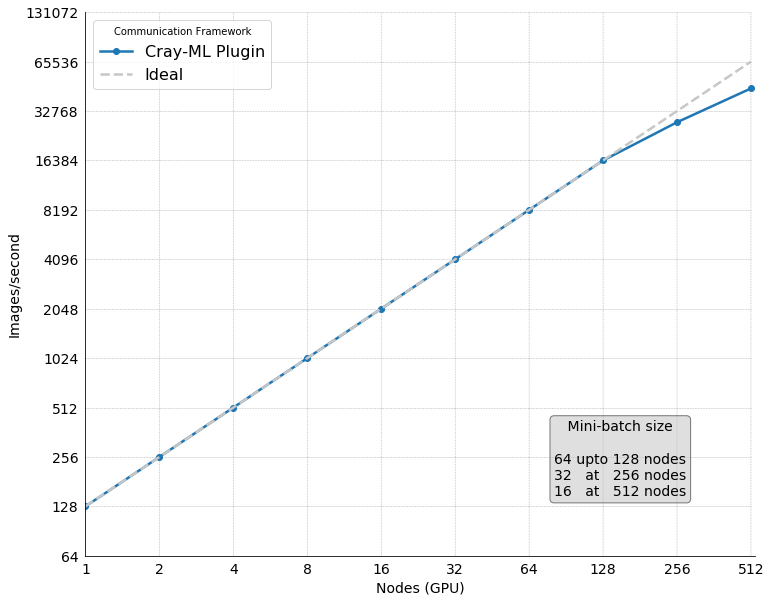

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd  

xmin = 1
xmax = 512
xstep = 2
xnum = 10

ymin = 64
ymax = 131072
ystep = 2
ynum = 12

xaxis =  [xmin * xstep**i for i in range(xnum)]
yaxis =  [ymin * ystep**i for i in range(ynum)]

xvalues = xaxis
functions = ['Cray-ML Plugin','Ideal']
data=np.array(([[128, 256, 512, 1024, 2048, 4096, 8192, 16384, 28000, 45000],
                [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536],
                [144.84, 285.63, 564.18, 1129.35, 2232.82, 4418.79, 8680.11, 17405.76, 25112.00, 21420.12]
               ]))

# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (199, 199, 199), (214, 39, 40)]
markers = ['o', '', 'o']
linestyles =['solid', 'dashed', 'solid']
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)    

# You typically want your plot to be ~1.33x wider than tall. This plot is a rare    
# exception because of the number of lines being plotted on it.    
# Common sizes: (10, 7.5) and (12, 9)    
plt.figure(figsize=(12, 10))    
  
# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
#ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
#ax.spines["left"].set_visible(False)    
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=2)
  
# Limit the range of the plot to only where the data is.    
# Avoid unnecessary whitespace.    
plt.ylim(ymin, ymax)
#plt.ylim(ymin, ymax)    
plt.xlim(xmin, xmax+20)    
  
# Make sure your axis ticks are large enough to be easily read.    
# For geometric progressions
plt.yticks(yaxis, [str(int(x)) for x in yaxis], fontsize=14)
# You don't want your viewers squinting to read your plot.    
#plt.yticks([y / 100.0 for y in range(ymin, ymax + 1, ystep)], [str(int(x*100))+'%' for x in [y / 100.0 for y in range(ymin, ymax + 1, ystep)]], fontsize=14)
#can use the above for non-integer step values
#plt.yticks(range(ymin, ymax+1, ystep), [str(x) for x in range(ymin, ymax+1, ystep)], fontsize=14) 
plt.xticks(xaxis, [str(x) for x in xaxis], fontsize=14)    
  
# Provide tick lines across the plot to help your viewers trace along    
# the axis ticks. Make sure that the lines are light and small so they    
# don't obscure the primary data lines.
#for y in [y / 10.0 for y in range(ymin, ymax + 1, ystep)]:
for y in yaxis:   
    plt.plot(range(xmin, xmax+1), [y] * len(range(xmin, xmax+1)), "--", lw=0.5, color="black", alpha=0.3)
for x in xaxis:   
    plt.plot([x] * len(range(ymin, ymax+1)), range(ymin, ymax+1), "--", lw=0.5, color="black", alpha=0.3) 

# Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")   
  
for rank, column in enumerate(functions):    
    # Plot each line separately with its own color, using the Tableau 20    
    # color set in order.    
    plt.plot(xvalues, data[rank], lw=2.5, color=tableau20[rank], label=column, marker=markers[rank], linestyle=linestyles[rank])
    #y_pos = 0.1
    #y_pos = data[rank][len(xvalues)-1:] - ((-1)**rank * 0.05)
    if rank == 0:
        y_pos = 0.005
        x_pos = 10
    elif rank == 1:
        y_pos = 0.025
        x_pos = 95
    elif rank == 2:
        y_pos = 0.025
        x_pos = 70
    elif rank == 3:
        y_pos = 0.04
        x_pos = 50
    elif rank == 4:
        y_pos = 0.025
        x_pos = 190
    #plt.text(x_pos, y_pos, '#iter: ' + str(iterations[rank]), fontsize=14, color=tableau20[rank*2])

#plt.title('Convergence', fontsize=18)
plt.xlabel('Nodes (GPU)', fontsize = 14)
plt.ylabel('Images/second', fontsize = 14)
plt.legend(loc=2, fontsize=16, title='Communication Framework')
#plt.show()

textstr = '\n'.join((
    r'   Mini-batch size',
    r'',
    r'64 upto 128 nodes',
    r'32   at   256 nodes',
    r'16   at   512 nodes'))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='silver', alpha=0.5)

# place a text box in upper left in axes coords
plt.text(0.7, 0.25, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.savefig("Cray-ML.png", bbox_inches="tight")

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


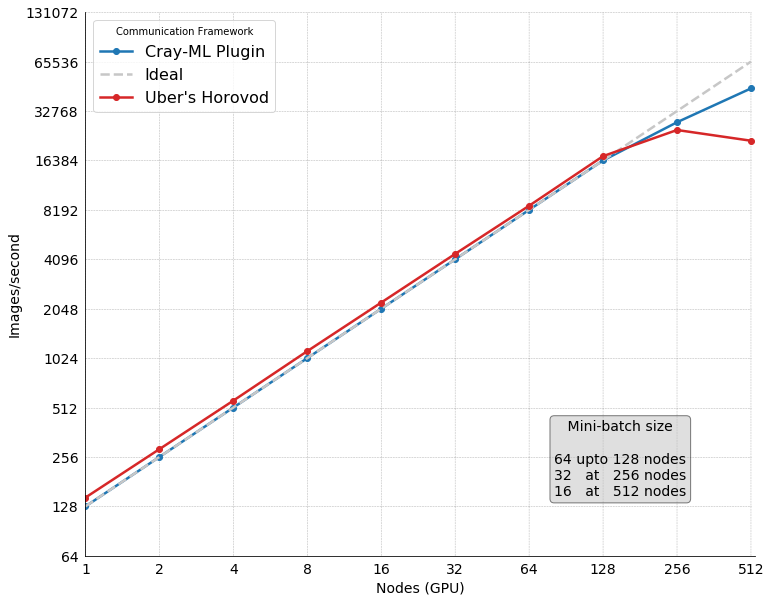

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd  

xmin = 1
xmax = 512
xstep = 2
xnum = 10

ymin = 64
ymax = 131072
ystep = 2
ynum = 12

xaxis =  [xmin * xstep**i for i in range(xnum)]
yaxis =  [ymin * ystep**i for i in range(ynum)]

xvalues = xaxis
functions = ['Cray-ML Plugin','Ideal','Uber\'s Horovod']
data=np.array(([[128, 256, 512, 1024, 2048, 4096, 8192, 16384, 28000, 45000],
                [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536],
                [144.84, 285.63, 564.18, 1129.35, 2232.82, 4418.79, 8680.11, 17405.76, 25112.00, 21608.92]
               ]))

# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (199, 199, 199), (214, 39, 40)]
markers = ['o', '', 'o']
linestyles =['solid', 'dashed', 'solid']
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)    

# You typically want your plot to be ~1.33x wider than tall. This plot is a rare    
# exception because of the number of lines being plotted on it.    
# Common sizes: (10, 7.5) and (12, 9)    
plt.figure(figsize=(12, 10))    
  
# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
#ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
#ax.spines["left"].set_visible(False)    
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=2)
  
# Limit the range of the plot to only where the data is.    
# Avoid unnecessary whitespace.    
plt.ylim(ymin, ymax)
#plt.ylim(ymin, ymax)    
plt.xlim(xmin, xmax+20)    
  
# Make sure your axis ticks are large enough to be easily read.    
# For geometric progressions
plt.yticks(yaxis, [str(int(x)) for x in yaxis], fontsize=14)
# You don't want your viewers squinting to read your plot.    
#plt.yticks([y / 100.0 for y in range(ymin, ymax + 1, ystep)], [str(int(x*100))+'%' for x in [y / 100.0 for y in range(ymin, ymax + 1, ystep)]], fontsize=14)
#can use the above for non-integer step values
#plt.yticks(range(ymin, ymax+1, ystep), [str(x) for x in range(ymin, ymax+1, ystep)], fontsize=14) 
plt.xticks(xaxis, [str(x) for x in xaxis], fontsize=14)    
  
# Provide tick lines across the plot to help your viewers trace along    
# the axis ticks. Make sure that the lines are light and small so they    
# don't obscure the primary data lines.
#for y in [y / 10.0 for y in range(ymin, ymax + 1, ystep)]:
for y in yaxis:   
    plt.plot(range(xmin, xmax+1), [y] * len(range(xmin, xmax+1)), "--", lw=0.5, color="black", alpha=0.3)
for x in xaxis:   
    plt.plot([x] * len(range(ymin, ymax+1)), range(ymin, ymax+1), "--", lw=0.5, color="black", alpha=0.3) 

# Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")   
  
for rank, column in enumerate(functions):    
    # Plot each line separately with its own color, using the Tableau 20    
    # color set in order.    
    plt.plot(xvalues, data[rank], lw=2.5, color=tableau20[rank], label=column, marker=markers[rank], linestyle=linestyles[rank])
    #y_pos = 0.1
    #y_pos = data[rank][len(xvalues)-1:] - ((-1)**rank * 0.05)
    if rank == 0:
        y_pos = 0.005
        x_pos = 10
    elif rank == 1:
        y_pos = 0.025
        x_pos = 95
    elif rank == 2:
        y_pos = 0.025
        x_pos = 70
    elif rank == 3:
        y_pos = 0.04
        x_pos = 50
    elif rank == 4:
        y_pos = 0.025
        x_pos = 190
    #plt.text(x_pos, y_pos, '#iter: ' + str(iterations[rank]), fontsize=14, color=tableau20[rank*2])

#plt.title('Convergence', fontsize=18)
plt.xlabel('Nodes (GPU)', fontsize = 14)
plt.ylabel('Images/second', fontsize = 14)
plt.legend(loc=2, fontsize=16, title='Communication Framework')
#plt.show()

textstr = '\n'.join((
    r'   Mini-batch size',
    r'',
    r'64 upto 128 nodes',
    r'32   at   256 nodes',
    r'16   at   512 nodes'))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='silver', alpha=0.5)

# place a text box in upper left in axes coords
plt.text(0.7, 0.25, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)



plt.savefig("Tensorflow_Horovod_Batchsize_reduced.png", bbox_inches="tight") 

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


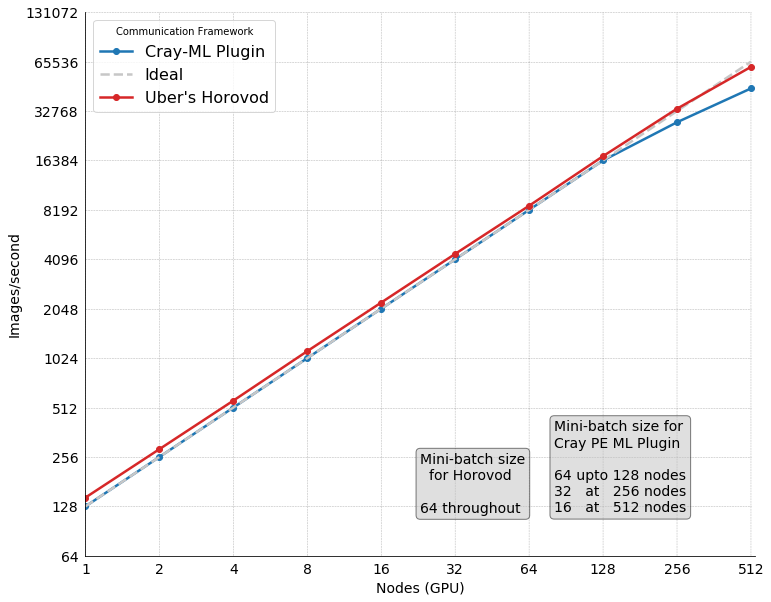

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd  

xmin = 1
xmax = 512
xstep = 2
xnum = 10

ymin = 64
ymax = 131072
ystep = 2
ynum = 12

xaxis =  [xmin * xstep**i for i in range(xnum)]
yaxis =  [ymin * ystep**i for i in range(ynum)]

xvalues = xaxis
functions = ['Cray-ML Plugin','Ideal','Uber\'s Horovod']
data=np.array(([[128, 256, 512, 1024, 2048, 4096, 8192, 16384, 28000, 45000],
                [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536],
                [144.84, 285.63, 564.18, 1129.35, 2232.82, 4418.79, 8680.11, 17405.76, 33857.00, 60864.96]
               ]))

# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (199, 199, 199), (214, 39, 40)]
markers = ['o', '', 'o']
linestyles =['solid', 'dashed', 'solid']
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)    

# You typically want your plot to be ~1.33x wider than tall. This plot is a rare    
# exception because of the number of lines being plotted on it.    
# Common sizes: (10, 7.5) and (12, 9)    
plt.figure(figsize=(12, 10))    
  
# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
#ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
#ax.spines["left"].set_visible(False)    
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=2)
  
# Limit the range of the plot to only where the data is.    
# Avoid unnecessary whitespace.    
plt.ylim(ymin, ymax)
#plt.ylim(ymin, ymax)    
plt.xlim(xmin, xmax+20)    
  
# Make sure your axis ticks are large enough to be easily read.    
# For geometric progressions
plt.yticks(yaxis, [str(int(x)) for x in yaxis], fontsize=14)
# You don't want your viewers squinting to read your plot.    
#plt.yticks([y / 100.0 for y in range(ymin, ymax + 1, ystep)], [str(int(x*100))+'%' for x in [y / 100.0 for y in range(ymin, ymax + 1, ystep)]], fontsize=14)
#can use the above for non-integer step values
#plt.yticks(range(ymin, ymax+1, ystep), [str(x) for x in range(ymin, ymax+1, ystep)], fontsize=14) 
plt.xticks(xaxis, [str(x) for x in xaxis], fontsize=14)    
  
# Provide tick lines across the plot to help your viewers trace along    
# the axis ticks. Make sure that the lines are light and small so they    
# don't obscure the primary data lines.
#for y in [y / 10.0 for y in range(ymin, ymax + 1, ystep)]:
for y in yaxis:   
    plt.plot(range(xmin, xmax+1), [y] * len(range(xmin, xmax+1)), "--", lw=0.5, color="black", alpha=0.3)
for x in xaxis:   
    plt.plot([x] * len(range(ymin, ymax+1)), range(ymin, ymax+1), "--", lw=0.5, color="black", alpha=0.3) 

# Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")   
  
for rank, column in enumerate(functions):    
    # Plot each line separately with its own color, using the Tableau 20    
    # color set in order.    
    plt.plot(xvalues, data[rank], lw=2.5, color=tableau20[rank], label=column, marker=markers[rank], linestyle=linestyles[rank])
    #y_pos = 0.1
    #y_pos = data[rank][len(xvalues)-1:] - ((-1)**rank * 0.05)
    if rank == 0:
        y_pos = 0.005
        x_pos = 10
    elif rank == 1:
        y_pos = 0.025
        x_pos = 95
    elif rank == 2:
        y_pos = 0.025
        x_pos = 70
    elif rank == 3:
        y_pos = 0.04
        x_pos = 50
    elif rank == 4:
        y_pos = 0.025
        x_pos = 190
    #plt.text(x_pos, y_pos, '#iter: ' + str(iterations[rank]), fontsize=14, color=tableau20[rank*2])

#plt.title('Convergence', fontsize=18)
plt.xlabel('Nodes (GPU)', fontsize = 14)
plt.ylabel('Images/second', fontsize = 14)
plt.legend(loc=2, fontsize=16, title='Communication Framework')
#plt.show()

textstr = '\n'.join((
    r'Mini-batch size for',
    r'Cray PE ML Plugin',
    r'',
    r'64 upto 128 nodes',
    r'32   at   256 nodes',
    r'16   at   512 nodes'))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='silver', alpha=0.5)

# place a text box in upper left in axes coords
plt.text(0.7, 0.25, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

textstr = '\n'.join((
    r'Mini-batch size',
    r'  for Horovod',
    r'',
    r'64 throughout'))

# place a text box in upper left in axes coords
plt.text(0.5, 0.19, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.savefig("Tensorflow_Horovod.png", bbox_inches="tight") 

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


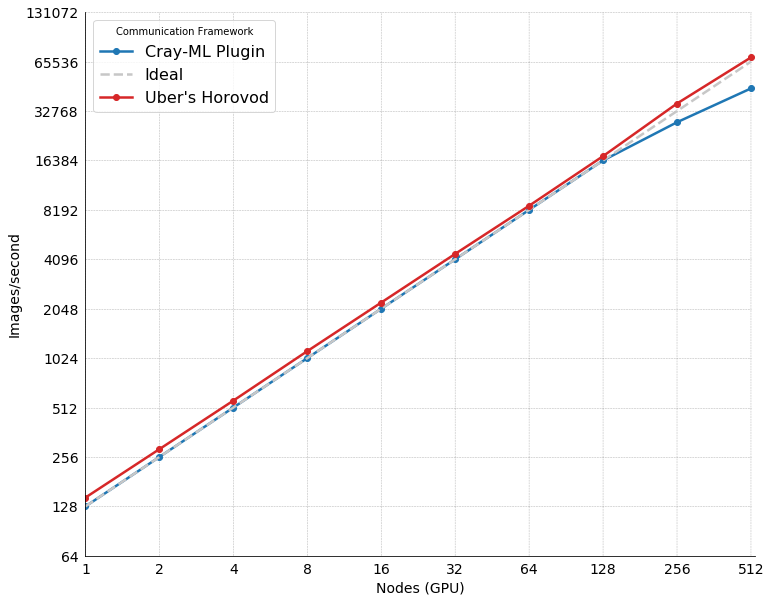

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd  

xmin = 1
xmax = 512
xstep = 2
xnum = 10

ymin = 64
ymax = 131072
ystep = 2
ynum = 12

xaxis =  [xmin * xstep**i for i in range(xnum)]
yaxis =  [ymin * ystep**i for i in range(ynum)]

xvalues = xaxis
functions = ['Cray-ML Plugin','Ideal','Uber\'s Horovod']
data=np.array(([[128, 256, 512, 1024, 2048, 4096, 8192, 16384, 28000, 45000],
                [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536],
                [144.84, 285.63, 564.18, 1129.35, 2232.82, 4418.79, 8680.11, 17405.76, 36412.17, 69504.91]
               ]))

# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (199, 199, 199), (214, 39, 40)]
markers = ['o', '', 'o']
linestyles =['solid', 'dashed', 'solid']
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)    

# You typically want your plot to be ~1.33x wider than tall. This plot is a rare    
# exception because of the number of lines being plotted on it.    
# Common sizes: (10, 7.5) and (12, 9)    
plt.figure(figsize=(12, 10))    
  
# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
#ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
#ax.spines["left"].set_visible(False)    
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=2)
  
# Limit the range of the plot to only where the data is.    
# Avoid unnecessary whitespace.    
plt.ylim(ymin, ymax)
#plt.ylim(ymin, ymax)    
plt.xlim(xmin, xmax+20)    
  
# Make sure your axis ticks are large enough to be easily read.    
# For geometric progressions
plt.yticks(yaxis, [str(int(x)) for x in yaxis], fontsize=14)
# You don't want your viewers squinting to read your plot.    
#plt.yticks([y / 100.0 for y in range(ymin, ymax + 1, ystep)], [str(int(x*100))+'%' for x in [y / 100.0 for y in range(ymin, ymax + 1, ystep)]], fontsize=14)
#can use the above for non-integer step values
#plt.yticks(range(ymin, ymax+1, ystep), [str(x) for x in range(ymin, ymax+1, ystep)], fontsize=14) 
plt.xticks(xaxis, [str(x) for x in xaxis], fontsize=14)    
  
# Provide tick lines across the plot to help your viewers trace along    
# the axis ticks. Make sure that the lines are light and small so they    
# don't obscure the primary data lines.
#for y in [y / 10.0 for y in range(ymin, ymax + 1, ystep)]:
for y in yaxis:   
    plt.plot(range(xmin, xmax+1), [y] * len(range(xmin, xmax+1)), "--", lw=0.5, color="black", alpha=0.3)
for x in xaxis:   
    plt.plot([x] * len(range(ymin, ymax+1)), range(ymin, ymax+1), "--", lw=0.5, color="black", alpha=0.3) 

# Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")   
  
for rank, column in enumerate(functions):    
    # Plot each line separately with its own color, using the Tableau 20    
    # color set in order.    
    plt.plot(xvalues, data[rank], lw=2.5, color=tableau20[rank], label=column, marker=markers[rank], linestyle=linestyles[rank])
    #y_pos = 0.1
    #y_pos = data[rank][len(xvalues)-1:] - ((-1)**rank * 0.05)
    if rank == 0:
        y_pos = 0.005
        x_pos = 10
    elif rank == 1:
        y_pos = 0.025
        x_pos = 95
    elif rank == 2:
        y_pos = 0.025
        x_pos = 70
    elif rank == 3:
        y_pos = 0.04
        x_pos = 50
    elif rank == 4:
        y_pos = 0.025
        x_pos = 190
    #plt.text(x_pos, y_pos, '#iter: ' + str(iterations[rank]), fontsize=14, color=tableau20[rank*2])

#plt.title('Convergence', fontsize=18)
plt.xlabel('Nodes (GPU)', fontsize = 14)
plt.ylabel('Images/second', fontsize = 14)
plt.legend(loc=2, fontsize=16, title='Communication Framework')
#plt.show()
plt.savefig("Tensorflow_Horovod_Batchsize_increased.png", bbox_inches="tight") 